In [2]:
import pandas as pd
import numpy as np

In [4]:
def load_data():
    df=pd.read_csv('../data/dailyclimate.csv')
    return(df)

In [38]:
import pandas as pd
import geopandas as gpd
from pathlib import Path

# Set the base data path
data_path = Path("./data")

# Function to load CSV safely
def load_csv_safe(filepath, **kwargs):
    try:
        df = pd.read_csv(filepath, **kwargs)
        print(f"✅ Loaded: {filepath.name} with shape {df.shape}")
        return df
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")
        return pd.DataFrame()
    except Exception as e:
        print(f"❌ Error loading {filepath.name}: {e}")
        return pd.DataFrame()

# Function to load shapefile safely
def load_shapefile_safe(filepath):
    try:
        gdf = gpd.read_file(filepath)
        print(f"✅ Loaded shapefile: {filepath.name} with {len(gdf)} records")
        return gdf
    except FileNotFoundError:
        print(f"❌ Shapefile not found: {filepath}")
        return gpd.GeoDataFrame()
    except Exception as e:
        print(f"❌ Error loading shapefile {filepath.name}: {e}")
        return gpd.GeoDataFrame()

# Load datasets
climate_df = load_csv_safe(data_path / 'dailyclimate.csv')
glacier_df = load_csv_safe(data_path / "glaciers_change_in_basins_subbasins_1980_1990_2000_2010.csv")
land_use_df = load_csv_safe(data_path / "land_use_statistics_1967_2010.csv")
agri_df = load_csv_safe(data_path / "nepal_agri_stats_cereal_197980_201314.csv")
local_units_gdf = load_shapefile_safe(data_path / "local_unit_shapefiles" / "local_unit.shp")

# Display basic summaries
datasets = {
    "Climate Data": climate_df,
    "Glacier Change Data": glacier_df,
    "Land Use Statistics": land_use_df,
    "Agricultural Statistics": agri_df,
    "Geospatial Data (Local Units)": local_units_gdf
}

for name, df in datasets.items():
    print(f"\n--- {name} ---")
    if df.empty:
        print("⚠️ Dataset is empty or failed to load.\n")
    else:
        df.info()
        print(df.head(), "\n")

✅ Loaded: dailyclimate.csv with shape (883128, 23)
✅ Loaded: glaciers_change_in_basins_subbasins_1980_1990_2000_2010.csv with shape (19, 18)
✅ Loaded: land_use_statistics_1967_2010.csv with shape (6, 6)
✅ Loaded: nepal_agri_stats_cereal_197980_201314.csv with shape (75, 524)
✅ Loaded shapefile: local_unit.shp with 777 records

--- Climate Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883128 entries, 0 to 883127
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          883128 non-null  int64  
 1   Date                883128 non-null  object 
 2   District            883128 non-null  object 
 3   Latitude            883128 non-null  float64
 4   Longitude           883128 non-null  float64
 5   Precip              883128 non-null  float64
 6   Pressure            883128 non-null  float64
 7   Humidity_2m         883128 non-null  float64
 8   RH_2m               883128 non-nul

In [22]:
#climate data preprocessing

# Load data
climate_path = './data/dailyclimate.csv'
climate_df = pd.read_csv(climate_path)

# Convert DATE to datetime safely
climate_df['Date'] = pd.to_datetime(climate_df['Date'], format='%m/%d/%Y', errors='coerce')

# Extract year, month, and day from DATE
climate_df['Year'] = climate_df['Date'].dt.year
climate_df['Month'] = climate_df['Date'].dt.month
climate_df['Day'] = climate_df['Date'].dt.day

# Define Nepal's meteorological seasons
def get_season(month):
    if pd.isna(month):
        return 'Unknown'
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'
    return 'Unknown'

climate_df['Season'] = climate_df['Month'].apply(get_season)

# Report missing values
missing = climate_df.isnull().sum()
missing = missing[missing > 0]
if not missing.empty:
    print("🔍 Missing Values:\n", missing)
else:
    print("✅ No missing values detected.")

# Display summary statistics for numeric columns
print("\n📊 Summary Statistics:")
print(climate_df.describe(include='number'))

# Preview the updated DataFrame
print("\n📋 Updated DataFrame Preview:")
print(climate_df.head())


🔍 Missing Values:
 Date     883128
Year     883128
Month    883128
Day      883128
dtype: int64

📊 Summary Statistics:
          Unnamed: 0       Latitude      Longitude         Precip  \
count  883128.000000  883128.000000  883128.000000  883128.000000   
mean   441563.500000      27.959677      84.277419       2.433753   
std    254937.238602       0.883261       2.181331       6.160721   
min         0.000000      26.500000      80.200000       0.000000   
25%    220781.750000      27.300000      82.400000       0.000000   
50%    441563.500000      27.950000      84.300000       0.050000   
75%    662345.250000      28.500000      85.900000       1.870000   
max    883127.000000      30.000000      87.900000     177.790000   

            Pressure    Humidity_2m          RH_2m        Temp_2m  \
count  883128.000000  883128.000000  883128.000000  883128.000000   
mean       82.896390       8.491043      55.657950      15.815832   
std        10.707984       5.426636      22.877576  

In [46]:
#glacier data Preprocessing

import pandas as pd

# Step 1: Load glacier data
glacier_path = './data/glaciers_change_in_basins_subbasins_1980_1990_2000_2010.csv'
glacier_df = pd.read_csv(glacier_path)

# Step 2: Standardize column names
glacier_df.columns = (
    glacier_df.columns
    .str.strip()
    .str.lower()
    .str.replace('~', '', regex=False)
    .str.replace(' ', '_')
    .str.replace(r'\(km2\)', '', regex=True)
    .str.replace(r'\(km3\)', '', regex=True)
    .str.replace(r'\(masl\)', '', regex=True)
    .str.replace(r'[()]', '', regex=True)
)

# Step 3: Rename columns for reshaping
glacier_df.rename(columns={
    'glacier_no._in_1980': 'glacier_count_1980',
    'glacier_no._in_1990': 'glacier_count_1990',
    'glacier_no._in_2000': 'glacier_count_2000',
    'glacier_no._in_2010': 'glacier_count_2010',
    'glacier_area_in_1980': 'glacier_area_1980',
    'glacier_area_1990': 'glacier_area_1990',
    'glacier_area_2000': 'glacier_area_2000',
    'glacier_area_2010': 'glacier_area_2010',
    'estimated_ice_reserved_1980': 'ice_volume_1980',
    'estimated_ice_reserved_1990': 'ice_volume_1990',
    'estimated_ice_reserved2000': 'ice_volume_2000',
    'estimated_ice_reserved2010': 'ice_volume_2010',
    'minimum_elevation_in_1980': 'min_elev_1980',
    'minimum_elevation_in1990': 'min_elev_1990',
    'minimum_elevation_in2000': 'min_elev_2000',
    'minimum_elevation_in2010': 'min_elev_2010'
}, inplace=True)

# Step 4: Reshape from wide to long format
glacier_long = pd.wide_to_long(
    glacier_df,
    stubnames=['glacier_count', 'glacier_area', 'ice_volume', 'min_elev'],
    i=['basin', 'sub-basin'],
    j='year',
    sep='_',
    suffix='(1980|1990|2000|2010)'
).reset_index()

# Step 5: Convert year to integer
glacier_long['year'] = glacier_long['year'].astype(int)

# Step 6: Preview final output
print("✅ Glacier Data (Long Format with Year Column):")
print(glacier_long.head())


✅ Glacier Data (Long Format with Year Column):
      basin  sub-basin  year  glacier_count  glacier_area  ice_volume  \
0  Mahakali   Mahakali  1980            130         158.5       10.91   
1  Mahakali   Mahakali  1990            140         134.6        8.84   
2  Mahakali   Mahakali  2000            151         120.3        7.81   
3  Mahakali   Mahakali  2010            164         112.5        6.97   
4   Karnali  West Seti  1980            236         210.7       11.85   

   min_elev  
0      3627  
1      3657  
2      3684  
3      3695  
4      3903  


In [48]:
#Glacier change metrics
# Step 1: Pivot glacier_long to compare 1980 vs 2010
pivoted = glacier_long.pivot_table(
    index=['basin', 'sub-basin'],
    columns='year',
    values=['glacier_area', 'ice_volume', 'min_elev']
).reset_index()

# Step 2: Flatten multi-level column headers
pivoted.columns = [
    f"{var}_{int(year)}" if isinstance(year, (int, float)) else var
    for var, year in pivoted.columns.to_flat_index()
]

# Step 3: Calculate absolute changes between 1980 and 2010
pivoted['area_change_1980_2010'] = pivoted['glacier_area_2010'] - pivoted['glacier_area_1980']
pivoted['ice_loss_km3'] = pivoted['ice_volume_1980'] - pivoted['ice_volume_2010']
pivoted['elev_rise_m'] = pivoted['min_elev_2010'] - pivoted['min_elev_1980']

# Step 4: Preview key metrics
print("✅ Glacier Change Indicators (1980–2010):")
print(
    pivoted[
        ['basin', 'sub-basin', 'area_change_1980_2010', 'ice_loss_km3', 'elev_rise_m']
    ].round(2).head()
)


✅ Glacier Change Indicators (1980–2010):
     basin      sub-basin  area_change_1980_2010  ice_loss_km3  elev_rise_m
0  Gandaki  Budhi Gandaki                  -98.2         10.52        123.0
1  Gandaki   Kali Gandaki                 -149.9         16.42        181.0
2  Gandaki     Marsyangdi                 -123.8         13.79         62.0
3  Gandaki           Seti                  -17.0          1.67        193.0
4  Gandaki       Trishuli                  -72.2          8.42        133.0


In [52]:
#Land use data preprocessing

import pandas as pd

# Step 1: Load land use data
land_use_path = './data/land_use_statistics_1967_2010.csv'
land_use_df = pd.read_csv(land_use_path)

# Step 2: Clean column names
land_use_df.columns = (
    land_use_df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('%', '', regex=False)  # Remove '%' sign
)

# Step 3: Display structure and preview
print("📄 Land Use Data Info:")
land_use_df.info()
print("\n🔍 Land Use Data Preview:")
print(land_use_df.head())

# Step 4: Melt to long format
land_use_long = land_use_df.melt(
    id_vars='land_use_type',
    var_name='year',
    value_name='percentage'
)

# Step 5: Extract numeric year from column names
land_use_long['year'] = pd.to_numeric(
    land_use_long['year'].str.extract(r'(\d{4})')[0],
    errors='coerce'
)

# Step 6: Standardize land use type names
land_use_long['land_use_type'] = (
    land_use_long['land_use_type']
    .str.strip()
    .str.lower()
    .str.replace(r'[^a-z0-9_]+', '', regex=True)  # Remove non-alphanum (e.g., '*')
)

# Step 7: Drop missing values
land_use_long.dropna(subset=['year', 'percentage'], inplace=True)

# Step 8: Preview final dataset
print("\n📊 Tidy Land Use Data (Long Format):")
print(land_use_long.head())


📄 Land Use Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   land_use_type  6 non-null      object 
 1   1967_()        6 non-null      float64
 2   1978_()        6 non-null      float64
 3   1991_()        6 non-null      float64
 4   2000_()        6 non-null      float64
 5   2010_()        6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 420.0+ bytes

🔍 Land Use Data Preview:
     land_use_type  1967_()  1978_()  1991_()  2000_()  2010_()
0  Urban/Built up*     2.94     4.91     9.22    14.19     23.0
1       Open space     0.15     0.14     0.20     0.25      0.2
2            Water     1.95     2.02     1.96     1.85      0.9
3      Agriculture    52.07    51.40    56.46    53.83     47.0
4           Shrubs    19.81    17.71    11.87    10.44      9.0

📊 Tidy Land Use Data (Long Format):
  land_use_type  year 

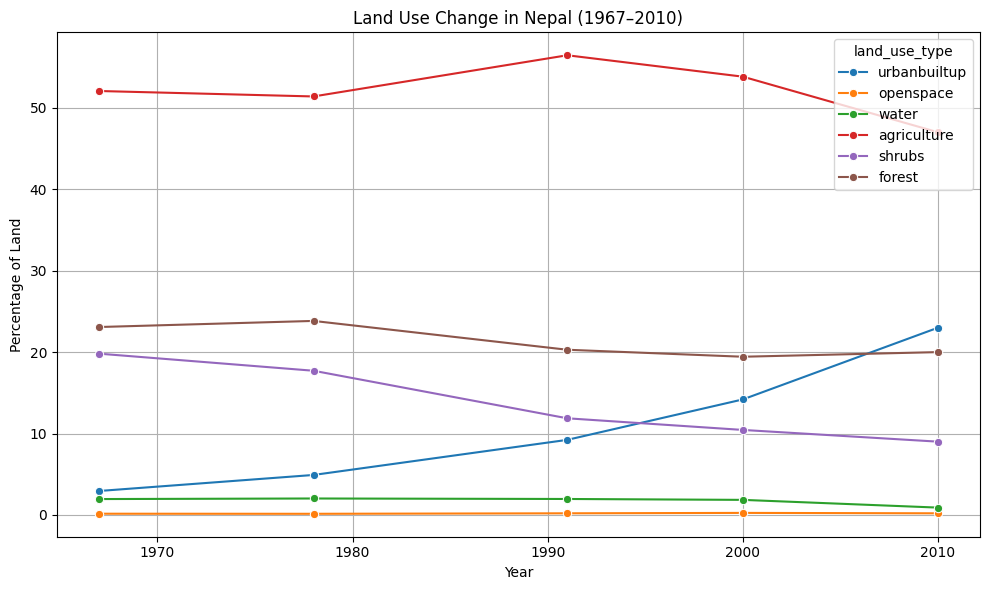

In [54]:
#land use trends
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=land_use_long, x='year', y='percentage', hue='land_use_type', marker='o')
plt.title("Land Use Change in Nepal (1967–2010)")
plt.xlabel("Year")
plt.ylabel("Percentage of Land")
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
#Cereal yeild data preprocessing
import pandas as pd

# Load data
agri_path = "./data/nepal_agri_stats_cereal_197980_201314.csv"
agri_df = pd.read_csv(agri_path)

# Overview
print("📄 Cereal Yield Data Info:")
agri_df.info()
print("\n🔍 Preview:")
print(agri_df.head())

# Step 1: Clean column names
agri_df.columns = agri_df.columns.str.strip().str.upper()

# Step 2: Identify yield columns (those with '_Y_')
yield_cols = [col for col in agri_df.columns if '_Y_' in col]

# Step 3: Subset dataframe
yield_df = agri_df[['DISTRICT_NAME'] + yield_cols].copy()

# Step 4: Melt to long format
yield_long = yield_df.melt(
    id_vars='DISTRICT_NAME',
    var_name='CROP_FY',
    value_name='YIELD'
)

# Step 5: Extract crop and fiscal year
extracted = yield_long['CROP_FY'].str.extract(r'([A-Z]+)_Y_(\d{6})')
yield_long['CROP'] = extracted[0].str.title()  # Capitalize crop names
yield_long['FY'] = extracted[1]

# Step 6: Format FY (e.g., "197980" → "1979/80")
yield_long['FY'] = yield_long['FY'].apply(lambda x: f"{x[:4]}/{x[4:]}" if pd.notna(x) else None)

# Step 7: Drop missing values
yield_long.dropna(subset=['DISTRICT_NAME', 'CROP', 'FY', 'YIELD'], inplace=True)

# Step 8: Final tidy DataFrame
yield_long = yield_long[['DISTRICT_NAME', 'CROP', 'FY', 'YIELD']]

# Preview tidy result
print("\n✅ Tidy Yield Data Preview:")
print(yield_long.head())


📄 Cereal Yield Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Columns: 524 entries, DISTRICT_CODE to BW_Y_201314
dtypes: float64(40), int64(483), object(1)
memory usage: 307.2+ KB

🔍 Preview:
   DISTRICT_CODE  DISTRICT_NAME  PD_P_197980  PD_P_198081  PD_P_198182  \
0              1      Taplejung         3320         3400         3570   
1              2      Panchthar         7180         7000         5680   
2              3           Ilam        18700        27530        30290   
3              4          Jhapa       148020       152250       137070   
4              5  Sankhuwasabha        20260        18480        18480   

   PD_P_198283  PD_P_198384  PD_P_198485  PD_P_198586  PD_P_198687  ...  \
0         3010         3070         3190         3800         3610  ...   
1         3810        14350        17440        18390        17600  ...   
2        15840        20040        27270        24950        21340  ...   
3       126570       160820  

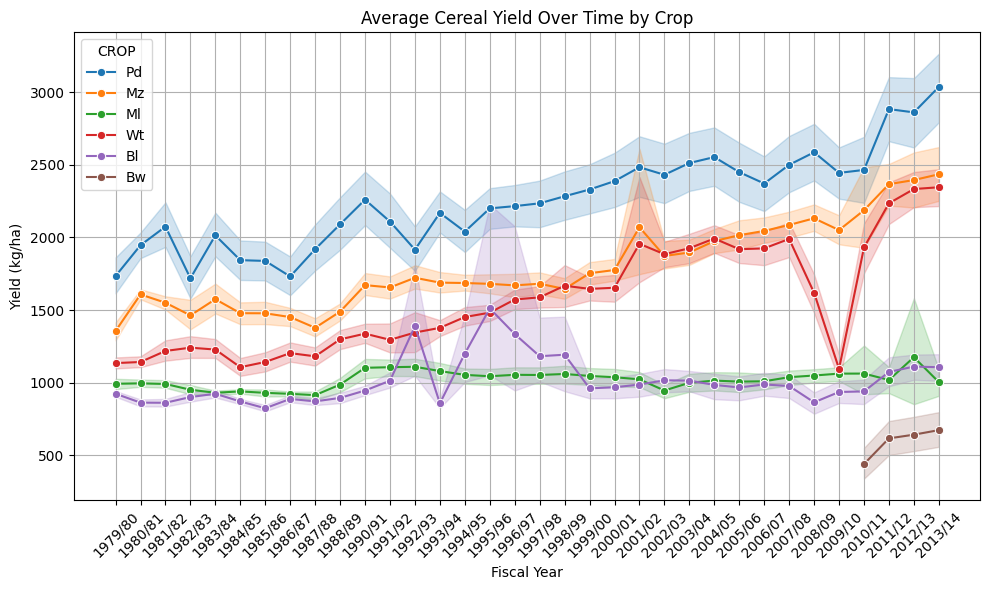

In [61]:
#yeild trend of crops

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=yield_long, x='FY', y='YIELD', hue='CROP', estimator='mean', marker='o')
plt.title("Average Cereal Yield Over Time by Crop")
plt.xlabel("Fiscal Year")
plt.ylabel("Yield (kg/ha)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [65]:
#geospatial preprocessing

import geopandas as gpd
from pathlib import Path

# Step 1: Load the shapefile
data_path = Path("./data") / "local_unit_shapefiles" / "local_unit.shp"
gdf = gpd.read_file(data_path)

# Step 2: Normalize column names
gdf.columns = gdf.columns.str.strip().str.upper()

# Step 3: Standardize district names
gdf['DISTRICT_NAME'] = gdf['DISTRICT'].str.strip().str.lower()

# ✅ Step 4: Ensure 'GEOMETRY' is set as active geometry
if 'GEOMETRY' in gdf.columns:
    gdf = gdf.set_geometry('GEOMETRY')

# Step 5: Dissolve polygons to one per district
district_gdf = gdf.dissolve(by='DISTRICT_NAME', as_index=False)

# Step 6: Project to UTM Zone 45N (EPSG:32645) for spatial accuracy
district_gdf_proj = district_gdf.to_crs(epsg=32645)

# Step 7: Compute centroids (in projected CRS)
district_gdf_proj['CENTROID'] = district_gdf_proj.geometry.centroid

# Step 8: Convert centroids to WGS84 for lat/lon extraction
centroids_wgs84 = district_gdf_proj.set_geometry('CENTROID').to_crs(epsg=4326)
centroids_wgs84['CENTROID_LAT'] = centroids_wgs84.geometry.y
centroids_wgs84['CENTROID_LON'] = centroids_wgs84.geometry.x

# Step 9: Final output
district_centroids = centroids_wgs84[['DISTRICT_NAME', 'CENTROID_LAT', 'CENTROID_LON']]

# Step 10: Preview
print("✅ District Centroid Coordinates:")
print(district_centroids.head())


✅ District Centroid Coordinates:
  DISTRICT_NAME  CENTROID_LAT  CENTROID_LON
0        achham     29.112404     81.298909
1  arghakhanchi     27.908325     83.081209
2       baglung     28.347399     83.252756
3       baitadi     29.507514     80.572998
4       bajhang     29.708035     81.180118
